In [9]:
import numpy as np
import matplotlib.pyplot as plt

from database import Voltage, Current, Cell_Voltage, Charge, session

In [2]:
x, charge = zip(*session.query(Charge.charge, Charge.charge).all())

In [3]:
len(charge)

5976

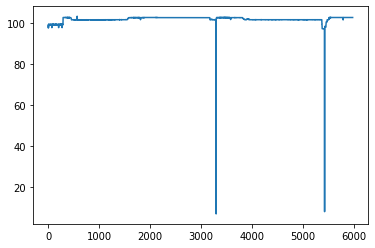

In [7]:
plt.plot(charge)
plt.show()


In [13]:
current = session.query(Current.current).all()

In [14]:
import plotly

ModuleNotFoundError: No module named 'plotly'

In [15]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
    100% |████████████████████████████████| 7.3MB 7.3kB/s ta 0:00:01  0% |▎                               | 51kB 546kB/s eta 0:00:14    3% |█                               | 235kB 491kB/s eta 0:00:15    4% |█▌                              | 337kB 461kB/s eta 0:00:16    6% |██                              | 450kB 560kB/s eta 0:00:13    7% |██▌                             | 563kB 617kB/s eta 0:00:11    11% |███▋                            | 819kB 569kB/s eta 0:00:12    13% |████▎                           | 962kB 603kB/s eta 0:00:11    13% |████▌                           | 1.0MB 597kB/s eta 0:00:11    15% |█████                           | 1.1MB 537kB/s eta 0:00:12    16% |█████▎                          | 1.2MB 426kB/s eta 0:00:15    18% |█████▉                          | 1.3MB 578kB/s eta 0:00:11    18% |██████                          | 1.4MB 622kB/s eta 0:00:10    19% |██████▏                         | 1.4M

In [16]:
import plotly

In [17]:
dir(plotly)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_docstring_gen',
 '_version',
 '_widget_version',
 'absolute_import',
 'animation',
 'basedatatypes',
 'basewidget',
 'callbacks',
 'colors',
 'data',
 'exceptions',
 'files',
 'graph_objs',
 'io',
 'offline',
 'optional_imports',
 'serializers',
 'subplots',
 'tools',
 'utils',
 'validators',
 'version']

In [19]:
current2 = session.query(Current.timestamp, Current.current).all()

In [75]:
# trying to save memory
def diff_gen(seq):
    last = seq[0][0]
    for ts, *rest in seq[1:]:
        yield (ts - last, ts, *rest)
        last = ts


def split_deltas(sequence):
    diffs = tuple(diff_gen(sequence))
    last_idx = 0
    for (idx, (diff, *rest)) in enumerate(diffs):
        if not 0 < diff.total_seconds() < 25:
            yield diffs[last_idx:idx]
            last_idx = idx

            
def get_chunks(sequence):
    results = []
    for diff, *data in split_deltas(sequence):
        results.append(data)
    return results


def get_chunks_xy(sequence):
    results = []
    for diff, *data in split_deltas(sequence):
        results.append(tuple(zip(*data))[1:])
    return results


In [76]:
results = get_chunks_xy(current2)

((datetime.datetime(2019, 11, 28, 16, 19, 25, 157897),
  datetime.datetime(2019, 11, 28, 16, 19, 48, 57251)),
 (0.0, 0.3116171658039093))